<a href="https://colab.research.google.com/github/100363504/MasterDL/blob/main/Topic_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En este código vamos a procesar un conjunto de datos que contiene artículos educativos para conseguir clasificarlos por tópicos y que sea más fácil el manejo de esta amplia base de datos.
Se va a modelar con BERTopic.

In [1]:
# Instalamos e importamos los paquetes necesarios.
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.4/143.4 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 12.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 42.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 45.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 70.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━

In [2]:
from bertopic import BERTopic
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import json
import numpy as np

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [3]:
# Los datos se encuentran almacenados en Drive, por lo que conectamos nuestro entorno a la carpeta donde se encuentran estos datos.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
file_path = "/content/drive/My Drive/Master UAH/Paralelizacion/data_part1.1.1.1.json"


In [5]:
# Leemos el archivo JSON donde se encuentran los artículos y obtenemos una lista de documentos 'abstract'
docs = []
with open(file_path, "r", encoding="utf-8") as file:
    for line in file:
        data = json.loads(line.strip())
        abstract_text = data['abstract']
        docs.append(abstract_text)

print(docs)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Primero hacemos un preprocesamiento simple de los datos, para ver la diferencia entre un preprocesamiento más sencillo y uno más complejo.

In [ ]:
# Tokenización
docs_tokenized = [nltk.word_tokenize(doc) for doc in docs]

# Normalización de texto: Convertir a minúsculas y eliminar caracteres especiales
docs_preprocessed = [[re.sub(r'[^a-zA-Z]', '', word.lower()) for word in doc] for doc in docs_tokenized]

docs_preprocessed = [' '.join(doc) if isinstance(doc, list) else str(doc) for doc in docs_preprocessed]


Este es el proprocesamiento más complejo. Se usan técnicas como la tokenización, la eliminación de palabras vacías, la normalización de texto y la lematización.

In [6]:
# Tokenización
docs_tokenized = [nltk.word_tokenize(doc) for doc in docs]

# Eliminación de palabras vacías (stop words)
stop_words = set(stopwords.words('english'))
docs_filtered = [[word for word in doc if word.lower() not in stop_words] for doc in docs_tokenized]

# Normalización de texto: Convertir a minúsculas y eliminar caracteres especiales
docs_normalized = [[re.sub(r'[^a-zA-Z0-9]', '', word.lower()) for word in doc] for doc in docs_filtered]

# Lematización
lemmatizer = WordNetLemmatizer()
docs_lemmatized = [[lemmatizer.lemmatize(word) for word in doc] for doc in docs_normalized]

# Unir tokens preprocesados en documentos nuevamente
docs_preprocessed = [' '.join(doc) for doc in docs_lemmatized]



In [7]:
# Por último, creamos y ajustamos el modelo BERTopic en los documentos preprocesados


topic_model = BERTopic()
topics, _ = topic_model.fit_transform(docs_preprocessed)

In [8]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,78567,-1_galaxy_star_group_function,"[galaxy, star, group, function, theory, equati...",[work study vacuum stability classical unstab...
1,0,1458,0_graphene_graphite_bilayer_nanoribbons,"[graphene, graphite, bilayer, nanoribbons, dir...",[using semiclassical approach input experiment...
2,1,1189,1_curve_galois_variety_projective,"[curve, galois, variety, projective, bundle, g...",[study sheaf e smooth projective curve x minim...
3,2,864,2_planet_transit_planetary_transiting,"[planet, transit, planetary, transiting, eccen...",[orbital parameter extrasolar planet significa...
4,3,840,3_pulsar_xray_kev_outburst,"[pulsar, xray, kev, outburst, timing, psr, sou...",[communicate detection soft 20 200 kev gamm...
...,...,...,...,...,...
1030,1029,10,1029_fractional_mittagleffler_reactiondiffusio...,"[fractional, mittagleffler, reactiondiffusion,...",[reaction rate theory inputoutput type model ...
1031,1030,10,1030_qtm_magnet_fe18_tunneling,"[qtm, magnet, fe18, tunneling, giantspin, tota...",[shown resonant quantum tunnelling magnetisati...
1032,1031,10,1031_wannier_ldadmft_pseudopotentials_orbitals,"[wannier, ldadmft, pseudopotentials, orbitals,...",[review formalism selfconsistent gw approximat...
1033,1032,10,1032_etamathrm_tmathrm_engine_carnot,"[etamathrm, tmathrm, engine, carnot, heat, eff...",[study class cyclic brownian heat engine frame...


import numpy as np
from google.colab import autoviz
df_634329966922276401 = autoviz.get_df('df_634329966922276401')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_634329966922276401, *['Topic'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3230713410373128155 = autoviz.get_df('df_3230713410373128155')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3230713410373128155, *['Count'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1575424921600299274 = autoviz.get_df('df_1575424921600299274')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1575424921600299274, *['Topic'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5809515681798666415 = autoviz.get_df('df_5809515681798666415')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5809515681798666415, *['Count'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1988493790511362708 = autoviz.get_df('df_1988493790511362708')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_1988493790511362708, *[[['Topic', 'Count']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_4965751639922401998 = autoviz.get_df('df_4965751639922401998')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_4965751639922401998, *['Topic', 'Count', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_4532474879181695351 = autoviz.get_df('df_4532474879181695351')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_4532474879181695351, *['Topic', 'count()', None], **{})
chart

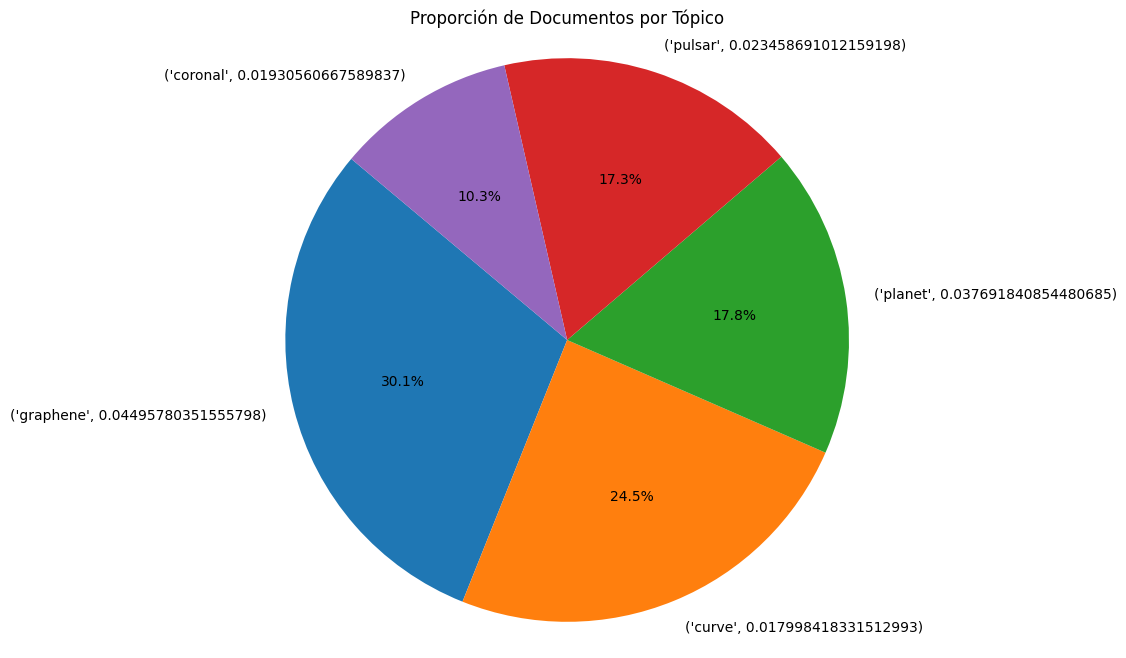

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

topics_df = pd.json_normalize(topics)

import matplotlib.pyplot as plt

# Gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=topic_names, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Proporción de Documentos por Tópico')
plt.show()




In [21]:
topic_model.visualize_barchart(top_n_topics=9, height=700)

In [23]:
topic_model.visualize_topics(top_n_topics=50)

In [10]:
total_documents = len(docs_preprocessed)
print("Número total de documentos:", total_documents)

Número total de documentos: 143253
